In [1]:
%%capture
%cd '../src'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

In [17]:
root = '../models/ablation_study/cnn3d-30_frames'
total_samples = {10 : 50,
                 25 : 125,
                 50 : 250,
                 75 : 375,
                 100 : 500,
                 150 : 663}
result = []
for f in os.listdir(root):
    samples_per_label = int(f.split('.')[0].replace('training', ''))
    train_samples = total_samples[samples_per_label]
    df = pd.read_csv(f'{root}/{f}', sep = ',')
    result.append((samples_per_label, 
                   train_samples,  
                   df['categorical_accuracy'].max(), 
                   df['val_categorical_accuracy'].max()))
df = pd.DataFrame(result, columns = ['n_lbl', 'n', 'train_acc', 'val_acc'])
df

,n_lbl,n,train_acc,val_acc
0,75,375,0.922667,0.66
1,10,50,1.000000,0.31
2,150,663,0.948718,0.80
3,25,125,0.896000,0.27
4,100,500,0.964000,0.71
5,50,250,0.968000,0.59


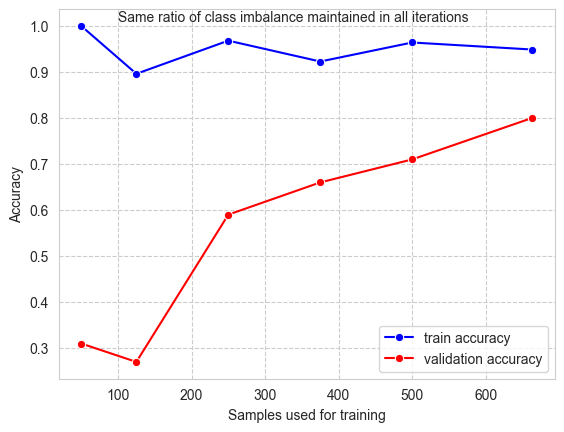

In [29]:
sns.lineplot(data = df, x = 'n', y = 'train_acc', color = 'blue', label = 'train accuracy', marker = 'o')
sns.lineplot(data = df, x = 'n', y = 'val_acc', color = 'red', label = 'validation accuracy', marker = 'o')
plt.xlabel('Samples used for training')
plt.ylabel('Accuracy')
plt.annotate('Same ratio of class imbalance maintained in all iterations', xy = (100, 1.01))
plt.grid(ls = '--')
plt.show()